In [1]:
from keras.applications import VGG16
import os,sys
import numpy as np
import pandas
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras import optimizers
import time
import glob
import cv2

Using TensorFlow backend.
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflo

In [2]:
from keras import backend as K

if 'tensorflow' == K.backend():
    import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=config))

In [3]:
model_file_name = 'model_SDNET2018_256.hdf5'
model = load_model('./model/' + model_file_name)

In [4]:
crack = []
files = glob.glob("./data/crack3/*.jpg")
for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        data = np.asarray(image)
        crack.append(data)
crack = np.array(crack)
crack = crack.astype('float32')
crack = crack / 255.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


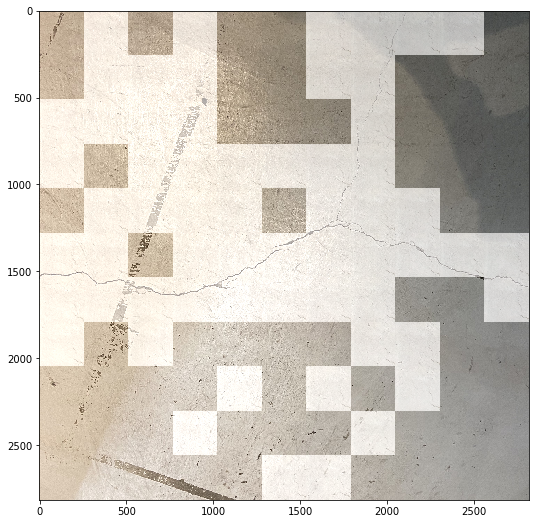

[0.28106794, 0.89261115, 0.45253146, 0.6299916, 0.16406052, 0.2436234, 0.6201127, 0.99981946, 0.9978968, 0.83846277, 0.16032597, 0.13935648, 0.87513375, 0.7779474, 0.7148059, 0.039461512, 0.42650047, 0.82285804, 1.0, 0.066159815, 0.24265864, 0.07930664, 0.9695086, 0.61753213, 0.59415215, 0.9736181, 0.16655701, 0.08340858, 0.4894153, 0.9999981, 0.19572517, 0.07939108, 0.07343109, 0.562808, 0.21390985, 0.79923475, 0.95269173, 0.7952693, 0.723882, 0.9881904, 0.99999857, 0.13495924, 0.05453205, 0.03551912, 0.028526291, 0.63492745, 0.7249235, 0.9928087, 0.8764618, 0.26973584, 1.0, 0.9999833, 0.6067176, 0.45555985, 0.11511914, 0.9604727, 0.9893027, 0.10253754, 0.9961869, 0.9999877, 0.9998073, 0.98292, 0.9999831, 0.9999995, 0.99677664, 0.8495778, 0.6125575, 0.99699783, 0.99996376, 0.99424475, 0.99986863, 0.8675761, 0.96139747, 0.99995315, 0.12391194, 0.15183978, 0.99322283, 0.725184, 0.13564701, 0.5647236, 0.10416328, 0.026041724, 0.09614404, 0.41550937, 0.9061221, 0.51037985, 0.07914997, 0.4

In [5]:
size = 256
dense_size = 2
img = crack[1]
pink_img = cv2.imread('./pink.jpg',1)
pink_img = pink_img.astype('float32')
pink_img = pink_img / 255.0
pink_img = cv2.resize(pink_img,(size,size) )
v_size = img.shape[0] // size * size
h_size = img.shape[1] // size * size 
img = img[:v_size, :h_size]
v_split = img.shape[0] // size
h_split = img.shape[1] // size

out_imgs = []
k = 0
for h_img in np.vsplit(img, v_split):
    for v_img in np.hsplit(h_img, h_split):
        out_imgs.append(v_img)
out_imgs = np.array(out_imgs)

a = np_utils.to_categorical(0, dense_size)
predict = model.predict(out_imgs)
map = []
for i in range(len(out_imgs)):
    map.append(predict[i][0])
    """
    #prei = predict[i:i+1] 
    if predict[i][0] <= 0.91:
         predict[i][0] = 0 
    #print(predict[i][0])
    """
    if predict[i].argmax() == 0:
        out_imgs[i] = cv2.addWeighted(out_imgs[i],0.5, pink_img,0.5,0.25)

for i in range(v_split):
        for j in range(h_split):
            if k >= len(out_imgs):break
            im = out_imgs[k]
            if j == 0:im1 = im
            else:im1 = np.hstack((im1,im))
            k += 1
        if i == 0:im2 = im1
        else:im2 = np.vstack((im2,im1))
        if k>= len(out_imgs):break

fig = plt.figure(figsize=(16,9))
plt.imshow(im2)
plt.show()
print(map)

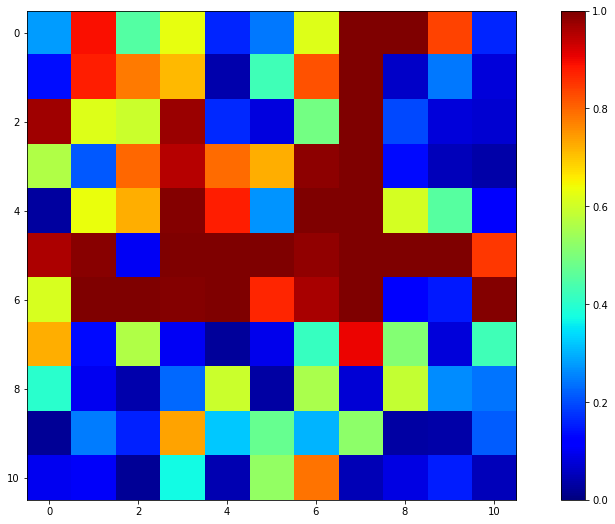

In [7]:
map = np.array(map)
k = 0
i = 0
j = 0
for i in range(v_split):
        for j in range(h_split):
            if k >= len(map):break
            im = map[k]
            if j == 0:im1 = im
            else:im1 = np.hstack((im1,im))
            k += 1
        if i == 0:im2 = im1
        else:im2 = np.vstack((im2,im1))
        if k>= len(map):break
            
# ヒートマップ表示
map = map.reshape([v_split, h_split])
fig2 = plt.figure(figsize=(16,9))
plt.imshow(map,interpolation='nearest',vmin=0,vmax=1,cmap='jet')
plt.colorbar()
plt.show()